In [1]:
# 모듈 불러오기
import tensorflow as tf
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
from PIL import Image

In [2]:
# 모델 불러오기
model = tf.keras.models.load_model('my_model.h5')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 80000)             0

In [4]:
# 라벨 만들기
class_names = ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches'] # fill the rest


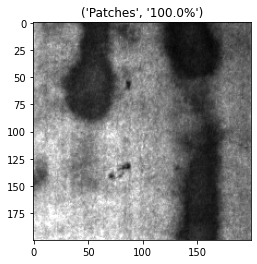

In [5]:
# test 이미지 1개 확인
image_pil = Image.open('test/Pa_101.bmp').convert("RGB")
img = np.array(image_pil)
img = img/255.  
img = img[tf.newaxis, ...] 
pred = model.predict(img)
classes = np.argmax(pred)
confidence = round(np.max(pred)*100,2)
names = class_names[classes]
title=names,str(confidence)+"%"
plt.title(title)
plt.imshow(np.squeeze(img),"gray")
plt.show()

In [10]:
os.listdir('test')
paths = glob("test/*")

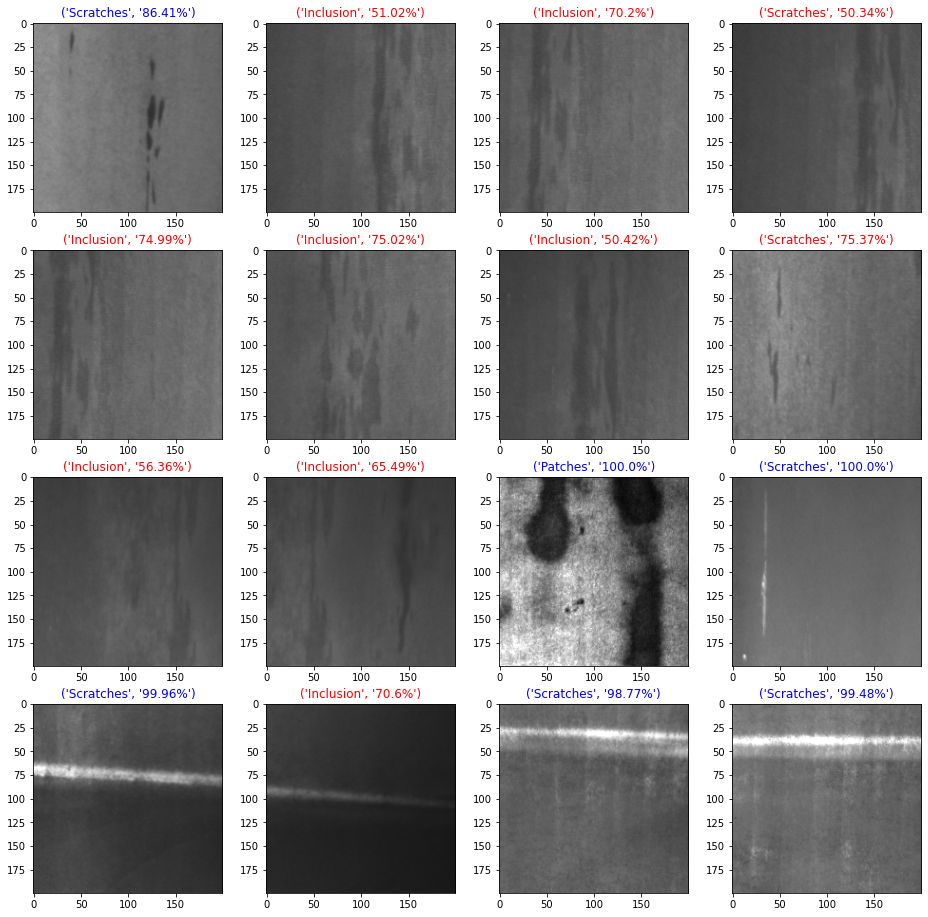

In [12]:
i=1
plt.figure(figsize=(16,16))
for path in paths:
    image_pil = Image.open(path).convert("RGB")
    img = np.array(image_pil)
    img = img/255.
    img = img[tf.newaxis, ...] 
    pred = model.predict(img)
    classes = np.argmax(pred)
    confidence = round(np.max(pred)*100,2)
    names = class_names[classes]
    title=names,str(confidence)+"%"
    plt.subplot(4,4,i)
    if confidence < 80:
        plt.title(title, color='red')
    else:
        plt.title(title, color='blue')
    plt.imshow(np.squeeze(img),"gray")
    i=i+1
plt.show()